# Introduction to Regression with Neural Networks in TenorFlow

In [62]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.constant(np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]))
y = tf.constant(np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]))

## Steps in modelling with TensorFlow
1. create a model - input, output, hidden layers
2. compiling a model - loss function, optimizer, evaluation metrics
3. fitting the model

In [12]:
tf.random.set_seed(42)
# 1. Create model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = "SGD", 
              metrics=['mae'])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 82ms/step - loss: 12.2480 - mae: 12.2480
Epoch 2/5
1/1 [==============================] - 0s 2ms/step - loss: 12.1155 - mae: 12.1155
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 11.9830 - mae: 11.9830
Epoch 4/5
1/1 [==============================] - 0s 2ms/step - loss: 11.8505 - mae: 11.8505
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 11.7180 - mae: 11.7180


### Prediction

In [13]:
model.predict([17.0])

1/1 [==============================] - 0s 26ms/step


array([[9.106379]], dtype=float32)

## Improving the Model

In [30]:
# Split Data
from sklearn.model_selection import train_test_split
# Turn tensors into NumPy
# Convert the TensorFlow tensors to NumPy arrays
X_np = X.numpy()
y_np = y.numpy()
# Split the data
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Convert the splits back into TensorFlow tensors
X_train = tf.convert_to_tensor(X_train_np)
X_test = tf.convert_to_tensor(X_test_np)
y_train = tf.convert_to_tensor(y_train_np)
y_test = tf.convert_to_tensor(y_test_np)

In [38]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), 
              metrics=['mae'])


model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 392ms/step - loss: 14.1154 - mae: 14.1154
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 13.9760 - mae: 13.9760
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 13.8899 - mae: 13.8899
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 13.8074 - mae: 13.8074
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 13.7131 - mae: 13.7131
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 13.5927 - mae: 13.5927
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 13.4412 - mae: 13.4412
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 13.2474 - mae: 13.2474
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 13.0031 - mae: 13.0031
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 12.7006 - mae: 12.7006
Epoch 11/100
1/1 [==============================] - 0s 2m

In [39]:
predictions = model.predict([X_test])

1/1 [==============================] - 0s 28ms/step


### Evaluate the model

#### Visualise
- Data
- The Model
- The training of a model
- The predictions

In [64]:
# More Data
X = tf.range(-100, 100, 4)
y = X + 10

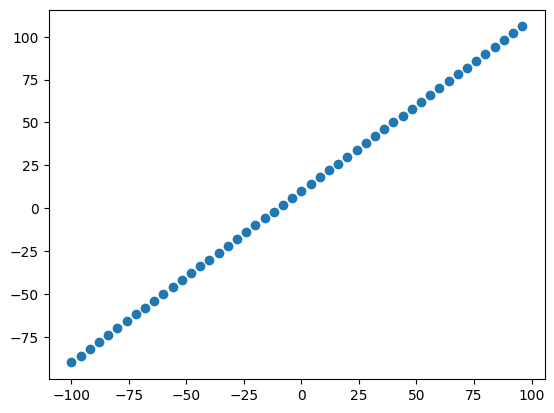

In [66]:
# Visualize the data
plt.scatter(X, y);

In [72]:
# The 3 sets...
len(X)

50

In [73]:
# Split the data into train and test
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

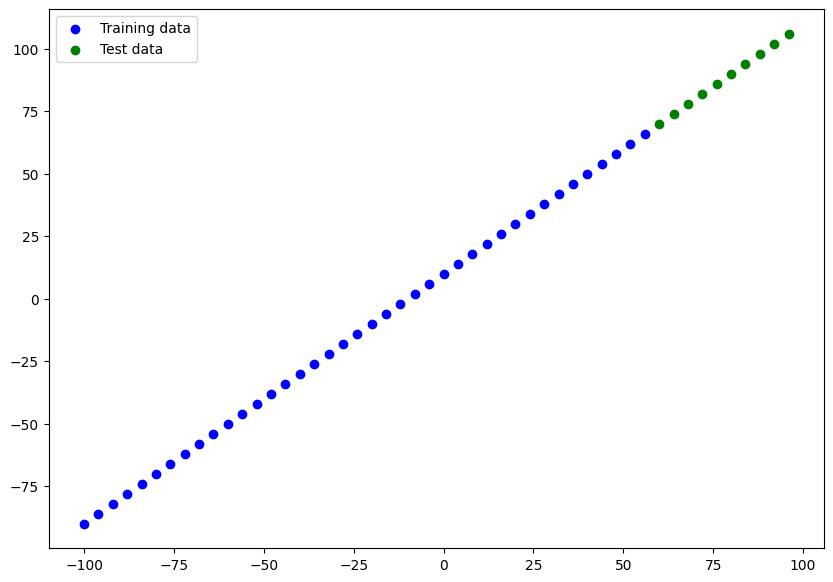

In [74]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend();

##### Visualising the model

In [115]:
# Let's create a model that builds automatically
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.legacy.SGD(), 
              metrics=['mae'])

In [116]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 100)               200       
                                                                 
Total params: 200 (800.00 Byte)
Trainable params: 200 (800.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Visualize Model Training

In [117]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100, verbose = 2)

Epoch 1/100
2/2 - 0s - loss: 40.9487 - mae: 40.9487 - 81ms/epoch - 40ms/step
Epoch 2/100
2/2 - 0s - loss: 40.6013 - mae: 40.6013 - 2ms/epoch - 799us/step
Epoch 3/100
2/2 - 0s - loss: 40.2319 - mae: 40.2319 - 2ms/epoch - 913us/step
Epoch 4/100
2/2 - 0s - loss: 39.8785 - mae: 39.8785 - 2ms/epoch - 757us/step
Epoch 5/100
2/2 - 0s - loss: 39.5223 - mae: 39.5223 - 2ms/epoch - 797us/step
Epoch 6/100
2/2 - 0s - loss: 39.1856 - mae: 39.1856 - 2ms/epoch - 751us/step
Epoch 7/100
2/2 - 0s - loss: 38.8520 - mae: 38.8520 - 1ms/epoch - 728us/step
Epoch 8/100
2/2 - 0s - loss: 38.4925 - mae: 38.4925 - 1ms/epoch - 731us/step
Epoch 9/100
2/2 - 0s - loss: 38.0856 - mae: 38.0856 - 1ms/epoch - 746us/step
Epoch 10/100
2/2 - 0s - loss: 37.7193 - mae: 37.7193 - 1ms/epoch - 705us/step
Epoch 11/100
2/2 - 0s - loss: 37.3801 - mae: 37.3801 - 2ms/epoch - 784us/step
Epoch 12/100
2/2 - 0s - loss: 36.9951 - mae: 36.9951 - 2ms/epoch - 794us/step
Epoch 13/100
2/2 - 0s - loss: 36.6201 - mae: 36.6201 - 1ms/epoch - 738us/

##### Visualise Model's Layer

In [103]:
predictions = model.predict(tf.expand_dims(X_test, axis=-1))

1/1 [==============================] - 0s 19ms/step


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert the predictions and true labels to the same format (e.g., NumPy arrays)
predictions_np = predictions.copy()
y_test_np = y_test.numpy()

# Calculate MSE, MAE, and R-squared
mse = mean_squared_error(y_test_np, predictions_np)
mae = mean_absolute_error(y_test_np, predictions_np)
r2 = r2_score(y_test_np, predictions_np)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 1.8554345451062546
Mean Absolute Error: 1.1747161865234375
R-squared: 0.9859436776885889


In [2]:
# This script needs these libraries to be installed: 
#   tensorflow, numpy

import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

import random
import numpy as np
import tensorflow as tf


# Start a run, tracking hyperparameters
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 512,
        "activation_1": "relu",
        "dropout": random.uniform(0.01, 0.80),
        "layer_2": 10,
        "activation_2": "softmax",
        "optimizer": "sgd",
        "loss": "sparse_categorical_crossentropy",
        "metric": "accuracy",
        "epoch": 8,
        "batch_size": 256
    }
)

# [optional] use wandb.config as your config
config = wandb.config

# get the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, y_train = x_train[::5], y_train[::5]  
x_test, y_test = x_test[::20], y_test[::20]
labels = [str(digit) for digit in range(np.max(y_train) + 1)]

# build a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
    tf.keras.layers.Dropout(config.dropout),
    tf.keras.layers.Dense(config.layer_2, activation=config.activation_2)
    ])

# compile the model
model.compile(optimizer=config.optimizer,
              loss=config.loss,
              metrics=[config.metric]
              )

# WandbMetricsLogger will log train and validation metrics to wandb
# WandbModelCheckpoint will upload model checkpoints to wandb
history = model.fit(x=x_train, y=y_train,
                    epochs=config.epoch,
                    batch_size=config.batch_size,
                    validation_data=(x_test, y_test),
                    callbacks=[
                      WandbMetricsLogger(log_freq=5),
                      WandbModelCheckpoint("models")
                    ])

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /Users/merlesteffen/.netrc


11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/8
24/47 [==============>...............] - ETA: 0s - loss: 2.2396 - accuracy: 0.1672INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 1s 14ms/step - loss: 2.1203 - accuracy: 0.2491 - val_loss: 1.8349 - val_accuracy: 0.6020
Epoch 2/8
44/47 [===========================>..] - ETA: 0s - loss: 1.7458 - accuracy: 0.5117INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 1.7352 - accuracy: 0.5170 - val_loss: 1.4991 - val_accuracy: 0.7220
Epoch 3/8
44/47 [===========================>..] - ETA: 0s - loss: 1.4461 - accuracy: 0.6428INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 1.4422 - accuracy: 0.6432 - val_loss: 1.2481 - val_accuracy: 0.7660
Epoch 4/8
43/47 [==========================>...] - ETA: 0s - loss: 1.2461 - accuracy: 0.6989INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 1.2392 - accuracy: 0.7017 - val_loss: 1.0670 - val_accuracy: 0.7900
Epoch 5/8
44/47 [===========================>..] - ETA: 0s - loss: 1.0939 - accuracy: 0.7325INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 1.0901 - accuracy: 0.7323 - val_loss: 0.9361 - val_accuracy: 0.8160
Epoch 6/8
40/47 [========================>.....] - ETA: 0s - loss: 0.9835 - accuracy: 0.7570INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 0.9770 - accuracy: 0.7580 - val_loss: 0.8392 - val_accuracy: 0.8260
Epoch 7/8
44/47 [===========================>..] - ETA: 0s - loss: 0.8932 - accuracy: 0.7759INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 0.8913 - accuracy: 0.7768 - val_loss: 0.7670 - val_accuracy: 0.8280
Epoch 8/8
44/47 [===========================>..] - ETA: 0s - loss: 0.8239 - accuracy: 0.7890INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
wandb: Adding directory to artifact (./models)... Done. 0.0s


47/47 [==============================] - 0s 10ms/step - loss: 0.8249 - accuracy: 0.7883 - val_loss: 0.7106 - val_accuracy: 0.8320


batch/accuracy,▁▁▂▂▂▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇█████▇█████████
batch/batch_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
batch/learning_rate,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
batch/loss,██▇▇▇▆▆▆▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
epoch/accuracy,▁▄▆▇▇███
epoch/epoch,▁▂▃▄▅▆▇█
epoch/learning_rate,▁▁▁▁▁▁▁▁
epoch/loss,█▆▄▃▂▂▁▁
epoch/val_accuracy,▁▅▆▇████
epoch/val_loss,█▆▄▃▂▂▁▁
batch/accuracy,0.78881
